In [24]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [25]:
data = pd.read_csv('../log/memoryLog.csv', comment='#')
data

,agent,time,news0,news1
0,0.0,1.0,94a598b1e2dbac0a,0
1,1.0,1.0,c5fc8457da65b53c,0
2,2.0,1.0,63b71300d20b0c7c,0
3,3.0,1.0,0.0,0.0
4,4.0,1.0,0.0,0.0
5,5.0,1.0,0.0,0.0
6,6.0,1.0,0.0,0.0
7,7.0,1.0,0.0,0.0
8,8.0,1.0,0.0,0.0
9,9.0,1.0,0.0,0.0


In [26]:
maxTimeIteration = data.max()['time']
maxTimeIteration

1000.0

In [27]:
maxUsers = data.max()['agent']
maxUsers

102.0

In [28]:
cuttedData = data.drop('agent', 1)
lt = list(cuttedData)
lt

['time', 'news0', 'news1']

In [29]:
listNews = []
ln = lt[1:]
for i in range(len(ln)):
    listNews = append(listNews, data.groupby(ln[i]).nunique().index.tolist()) #counts all news
listNews = list(set(listNews)) # removes duplicates
listNews

['c5fc8457da65b53c',
 '71650a6e70951536',
 'c4945b3a571b7c00',
 '63b71300d20b0c7c',
 '7710d87671c5bc7a',
 '0',
 '0.0',
 '94a598b1e2dbac0a']

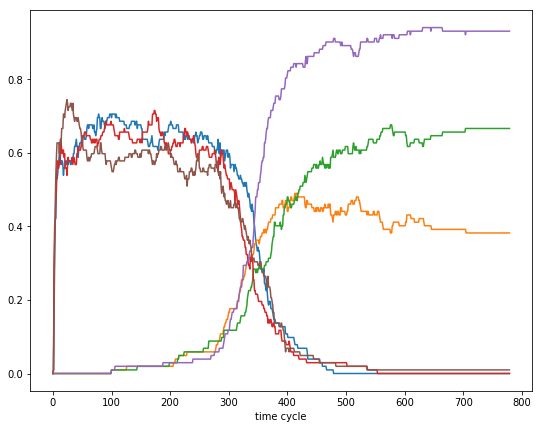

In [37]:
for ii, news in enumerate(listNews):
    if news == str(0) or news == str(0.0):
        continue
    arr = np.empty([0])
    for time in range(780):
        cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  time]
        counter = 0
        for index, row in cuttedSingleData.iterrows():
            if (row[ln] == news).any():
                counter = counter + 1
        arr = np.append(arr, counter)
    arr = arr / maxUsers
    xlabel('time cycle')
    ylabel('')
    figsize(9,7)
    plot(arr, label='News %s' % ii)
    savefig('memoryplot.pdf')
    #legend(loc='lower right')